In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# Load Cleaned Dataset
df = pd.read_csv (r"C:\Users\darre\DataProjects\data\cleaned_ecommerce_data.csv")

# Derive TotalPrice and YearMonth
df['TotalPrice'] = df['price'] * df['order_item_id']
df['YearMonth'] = pd.to_datetime(df['order_purchase_timestamp']).dt.to_period('M').astype(str)

# Display first few rows
print(df.head())

   Unnamed: 0                          order_id  \
0           0  e481f51cbdc54678b7cc49136f2d6af7   
1           1  53cdb2fc8bc7dce0b6741e2150273451   
2           2  47770eb9100c2d0c44946d9cf07ec65d   
3           3  949d5b44dbf5de918fe9c16f97b45f8a   
4           4  ad21c59c0840e6cb83a9ceb5573f8159   

                        customer_id order_status order_purchase_timestamp  \
0  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
1  b0830fb4747a6c6d20dea0b8c802d7ef    delivered      2018-07-24 20:41:37   
2  41ce2a54c0b03bf3443c3d931a367089    delivered      2018-08-08 08:38:49   
3  f88197465ea7920adcdbec7375364d82    delivered      2017-11-18 19:28:06   
4  8ab97904e6daea8866dbdbc4fb7aad2c    delivered      2018-02-13 21:18:39   

     order_approved_at order_delivered_carrier_date  \
0  2017-10-02 11:07:15          2017-10-04 19:55:00   
1  2018-07-26 03:24:27          2018-07-26 14:31:00   
2  2018-08-08 08:55:23          2018-08-08 13:50:00   
3  2017-11

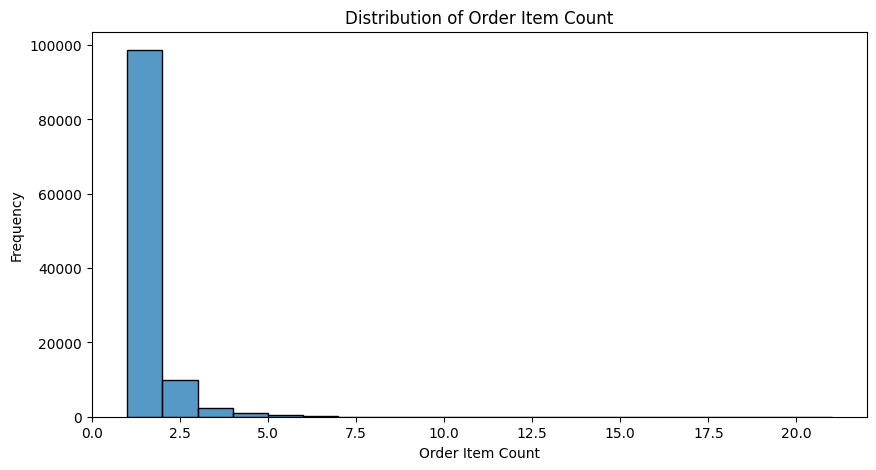

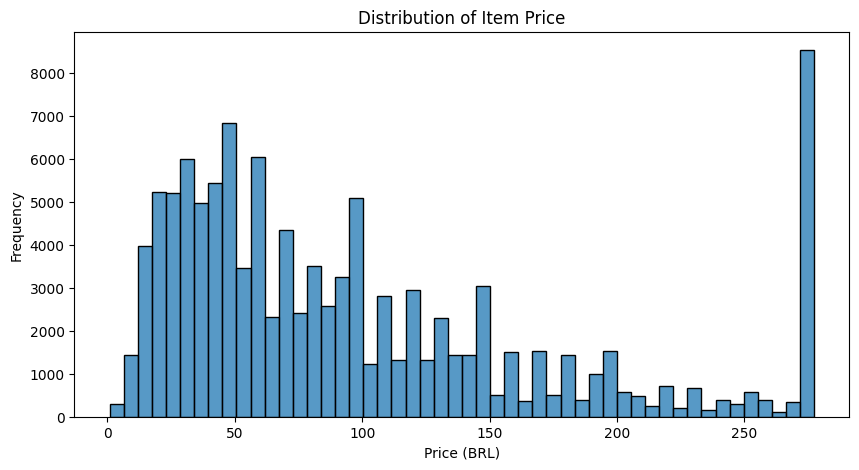

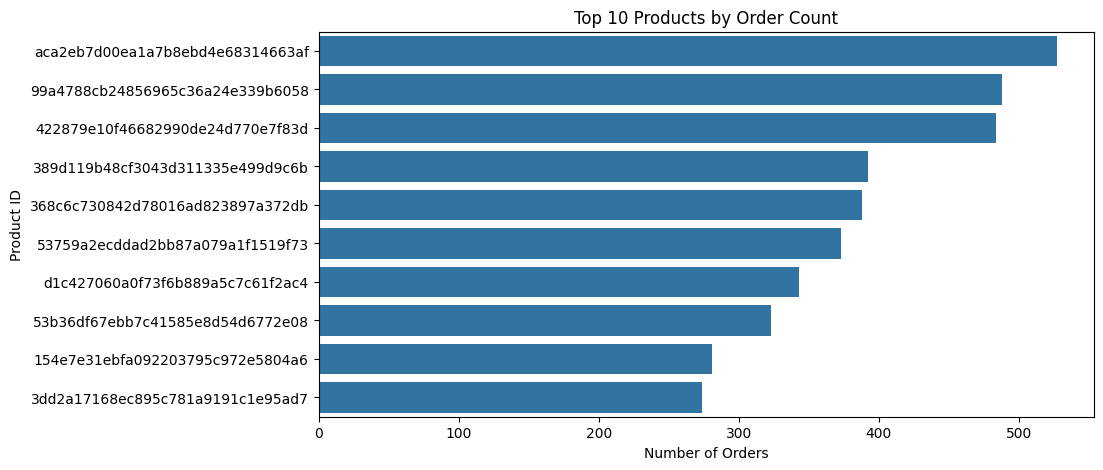

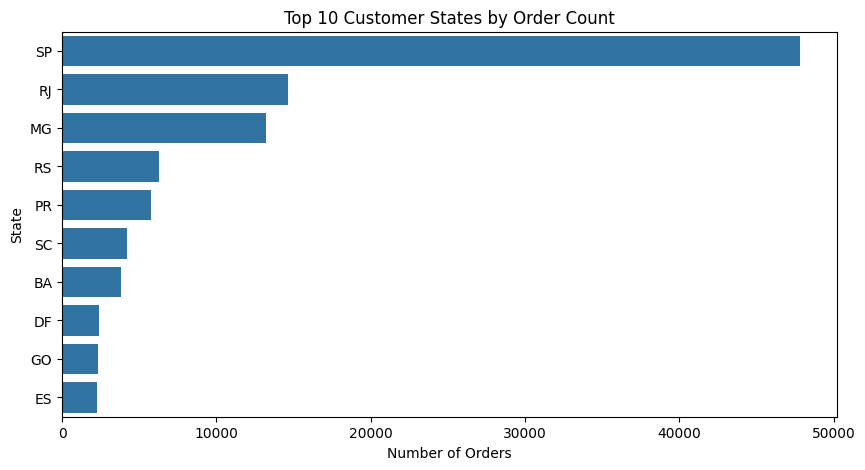

In [8]:
# Analysis of distributions and categorical variables for individual column characteristics
# Distribution of Quantity (order_item_id)
plt.figure(figsize=(10,5))
sns.histplot(df['order_item_id'], bins=20)
plt.title('Distribution of Order Item Count')
plt.xlabel('Order Item Count')
plt.ylabel('Frequency')
plt.savefig(r"C:\Users\darre\DataProjects\outputs\order_item_distribution.png")
plt.show()

# Distribution of UnitPrice
plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=50)
plt.title('Distribution of Item Price')
plt.xlabel('Price (BRL)')
plt.ylabel('Frequency')
plt.savefig(r"C:\Users\darre\DataProjects\outputs\price_distribution.png")
plt.show()

# 3. Categorical: Top 10 products (product_id)
top_products = df['product_id'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Products by Order Count')
plt.xlabel('Number of Orders')
plt.ylabel('Product ID')
plt.savefig('../outputs/top_products.png')
plt.show()

# 4. Categorical: Orders by customer_state
top_states = df['customer_state'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_states.values, y=top_states.index)
plt.title('Top 10 Customer States by Order Count')
plt.xlabel('Number of Orders')
plt.ylabel('State')
plt.savefig('../outputs/top_states.png')
plt.show()